In [1]:
import os

In [23]:
# clean last run result

!('./clean.sh')

In [3]:
# add the package to import path

import sys 
sys.path.append("../../")

In [4]:
from thunder_ase.fireball import Fireball
import numpy as np
import ase

### parameters for Si crystal

In [5]:
from ase.build import bulk

In [6]:
atoms = bulk('Si', 'diamond', a=5.459)

In [7]:
# set Fdata dir
Fdata_path='../../data/Fdata-McWEDA-0.15-3SN.Hs3.75.Os3.35p3.80.Als5.10p5.80.Sis4.8p5.35/'
#Fdata_path="../../data/CSi.3/Fdata/"

### parameters for fireball

In [8]:
kwargs = {'kpt_size': [7, 7, 7],
          'iwriteout_charges': 1,  # Writing out the charges.
          'taurelax': 5.0,
          'efermi_T': 200.0,
          'ifix_CHARGES': 0,
          'max_scf_iterations_set': 100,
          'scf_tolerance_set': 0.00000001,
          'beta_set': 0.04,
          }

### Run Fireball

In [9]:
calc = Fireball(command='/home/ren/bin/lightning.3.x', 
                Fdata_path=Fdata_path,
                **kwargs)
atoms.set_calculator(calc)

In [10]:
# Running this line will take about 1 min
e0 = atoms.get_potential_energy()
efermi = atoms.calc.get_fermi_level()

print("The energy is {:.3f} eV.".format(e0))
print("The Fermi Level is {:.3f} eV.".format(efermi))

  LIGHTNING RUNTIME :    1.17953100000000      [sec] 
The energy is -213.076 eV.
The Fermi Level is -1.683 eV.


### DOS plot

In [11]:
from ase.dft import DOS

In [12]:
dos = DOS(calc, width=0.2, window=[-8,4], npts=1000)

In [13]:
d = dos.get_dos()
e = dos.get_energies()

In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'DOS')

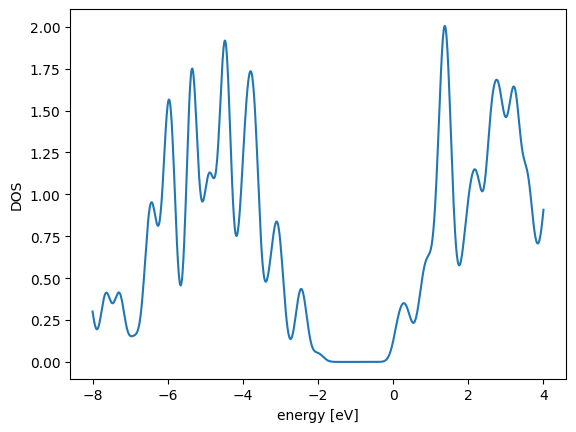

In [15]:
plt.plot(e, d)
plt.xlabel('energy [eV]')
plt.ylabel('DOS')

### Band structure calculation

In [16]:
lat = atoms.cell.get_bravais_lattice()
print(list(lat.get_special_points()))

['G', 'K', 'L', 'U', 'W', 'X']


In [17]:
path = lat.bandpath(path="LGXU,KG",npoints=200)

In [18]:
print(path.path)

LGXU,KG


In [19]:
kwargs = {'kpt_path': path,  # VIP for band structure calculation.
          'taurelax': 5.0,
          'efermi_T': 200.0,
          'ifix_CHARGES': 1,  # VIP, fix previous charges
          'beta_set': 0.04,
          }

In [20]:
calc = Fireball(command='/home/ren/bin/lightning.3.x', 
                Fdata_path=Fdata_path,
                **kwargs)
atoms.set_calculator(calc)

In [21]:
bs = atoms.calc.band_structure(atoms, reference=efermi) # Note: should use the scf fermi level

  LIGHTNING RUNTIME :   0.451044000000000      [sec] 


<AxesSubplot: ylabel='energies [eV]'>

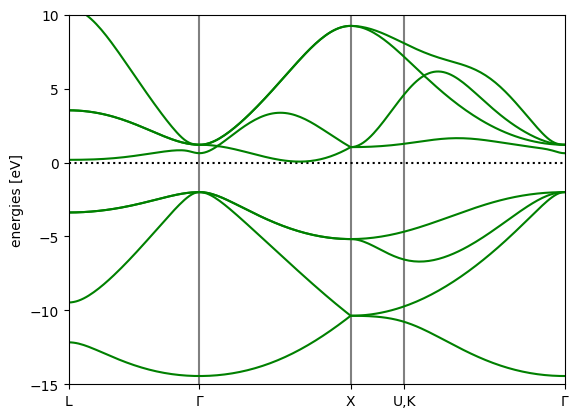

In [22]:
bs.subtract_reference().plot(emin=-15, emax=10)

Ref: https://commons.wikimedia.org/wiki/File:Band_structure_Si_schematic.svg

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Band_structure_Si_schematic.svg/580px-Band_structure_Si_schematic.svg.png)

Ref: http://lampx.tugraz.at/~hadley/ss1/semiconductors/Si_bandstructure.png

![](http://lampx.tugraz.at/~hadley/ss1/semiconductors/Si_bandstructure.png)